In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

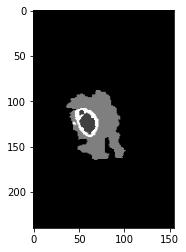

In [2]:
img = cv2.imread('../data/Outdir/BraTS20_Training_001/73.png')
plt.imshow(img)

In [7]:
import btseg.transformers as t

transforms = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=700),
    t.RegionSelection(region=1),
])

# t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
#     t.CannyEdge(threshold_1=50, threshold_2=100),
#     t.Dilate(kernel=None, iterations=1),
#     t.Erode(kernel=None, iterations=1),
#     t.MinimumBoundingBox()

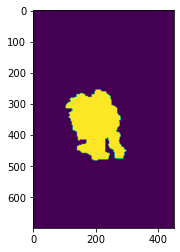

In [8]:
transformed_img = transforms(img)
plt.imshow(transformed_img)

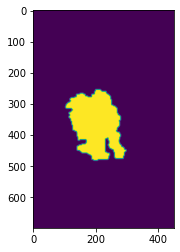

In [9]:
transformed_img = t.GaussianBlur(kernel_size=(7, 7), sigma_x=0)(transformed_img)
plt.imshow(transformed_img)

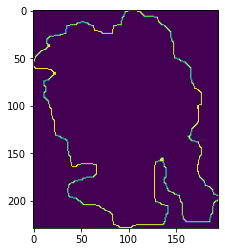

In [12]:
transformed_img = t.MinimumBoundingBox()(transformed_img)
plt.imshow(transformed_img)

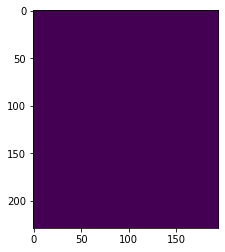

In [13]:
ref = np.zeros_like(transformed_img)
plt.imshow(ref)

In [14]:
contours, _ = cv2.findContours(transformed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

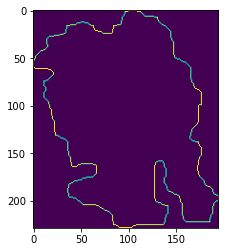

In [17]:
cv2.drawContours(ref, [contours[0]], 0, 255, 1)
plt.imshow(ref)

In [22]:
out = img.copy()

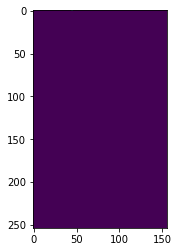

In [12]:
g_cnt = max(contours, key=cv2.contourArea)
cv2.drawContours(ref, g_cnt, 0, 255, 1)
# for contour in contours:
#     ref = cv2.polylines(ref, [contour], False, (0, 255, 0), 3) 
plt.imshow(ref)

In [23]:
# M = cv2.moments(contours[0])
M = cv2.moments(ref)

centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

print(centroid_x)
print(centroid_y)

119
237


In [24]:
width = img.shape[1]
height = img.shape[0]

print(width)
print(height)

155
240


In [25]:
N = 360
distances = []
import math

In [26]:
for i in np.arange(0, N, 1):
    tmp = np.zeros_like(ref)

    theta = i*(360/N)
    print(theta)
    theta *= np.pi/180.0

    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    print(row)
    print(col)

    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    
    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)


0.0
[]
[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
distances

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [18]:
len(distances)

360

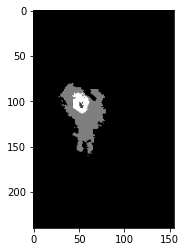

In [19]:
plt.imshow(out)

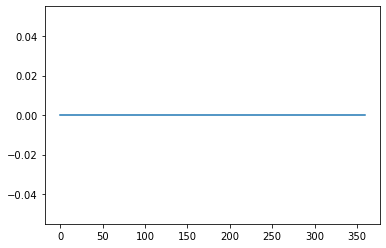

In [19]:
plt.plot(np.arange(0, N, 1), distances)

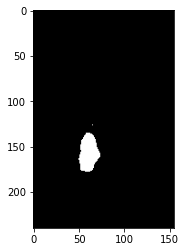

In [21]:
import cv2
import btseg.transformers as t
import matplotlib.pyplot as plt

img = cv2.imread('../data/Outdir/BraTS20_Training_094/154.png')
plt.imshow(img)

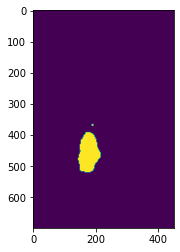

In [22]:
transforms = t.Compose([
        t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
        t.Resize(proportion_scale=True, g_measure=700),
        t.RegionSelection(region=1),
#         t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
#         t.CannyEdge(threshold_1=50, threshold_2=100),
#         t.Dilate(kernel=None, iterations=1),
#         t.Erode(kernel=None, iterations=1),
#         t.MinimumBoundingBox(),
        
])

transformed_img = transforms(img)
plt.imshow(transformed_img)

In [23]:
contours, _ = cv2.findContours(transformed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours

[array([[[168, 392]],
 
        [[168, 393]],
 
        [[168, 394]],
 
        [[168, 395]],
 
        [[168, 396]],
 
        [[168, 397]],
 
        [[167, 398]],
 
        [[166, 398]],
 
        [[165, 398]],
 
        [[165, 399]],
 
        [[165, 400]],
 
        [[164, 401]],
 
        [[163, 401]],
 
        [[162, 401]],
 
        [[162, 402]],
 
        [[162, 403]],
 
        [[162, 404]],
 
        [[162, 405]],
 
        [[162, 406]],
 
        [[161, 407]],
 
        [[160, 407]],
 
        [[159, 407]],
 
        [[159, 408]],
 
        [[159, 409]],
 
        [[159, 410]],
 
        [[159, 411]],
 
        [[159, 412]],
 
        [[158, 413]],
 
        [[157, 413]],
 
        [[156, 413]],
 
        [[156, 414]],
 
        [[156, 415]],
 
        [[155, 416]],
 
        [[154, 416]],
 
        [[153, 416]],
 
        [[153, 417]],
 
        [[153, 418]],
 
        [[153, 419]],
 
        [[153, 420]],
 
        [[153, 421]],
 
        [[153, 422]],
 
        [[153, 4

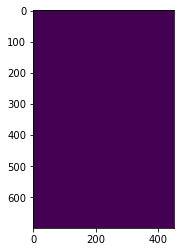

In [24]:
import numpy as np
ref = np.zeros_like(transformed_img)
plt.imshow(ref)

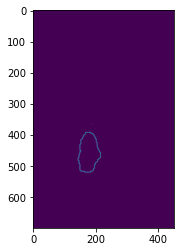

In [33]:
cv2.drawContours(ref, contours, 0, 255, 1)
# for contour in contours:
#     ref = cv2.polylines(ref, [contour], False, (0, 255, 0), 3) 
plt.imshow(ref)

In [26]:
M = cv2.moments(ref)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

In [27]:
width = transformed_img.shape[1]
height = transformed_img.shape[0]

print(width)
print(height)

452
700


In [28]:
N = 360
distances = []
import math
out = img.copy()

In [29]:
for i in np.arange(0, N, 1):
    tmp = np.zeros_like(transformed_img)

    theta = i*(360/N)
    theta *= np.pi/180.0

    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    
    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)

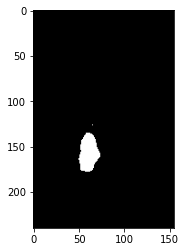

In [30]:
plt.imshow(out)

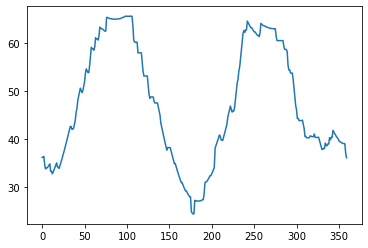

In [31]:
plt.plot(np.arange(0, N, 1), distances)